## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [--] : [TOPIC] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [ ]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Antonius Kevin Budi Saputra"
myNIM = "45444"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))


---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [1]:
import sys
import tensorflow.keras as tk
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("COVID-19.csv")

In [3]:
covid.head()

,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,...,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
0,AE,United Arab Emirates,2020-02-15,4.0,5.0,1.0,0.0,0.0,2.0,8,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
1,AE,United Arab Emirates,2020-02-16,4.0,4.0,1.0,1.0,1.0,2.0,9,...,5042.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2,AE,United Arab Emirates,2020-02-17,1.0,5.0,1.0,-1.0,1.0,2.0,9,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
3,AE,United Arab Emirates,2020-02-18,1.0,5.0,1.0,-2.0,0.0,2.0,9,...,6693.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
4,AE,United Arab Emirates,2020-02-19,0.0,4.0,1.0,-2.0,-1.0,2.0,9,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886


In [4]:
covid = covid[covid["country"]=="Indonesia"]

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 20832 to 21234
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso                                                 403 non-null    object 
 1   country                                             403 non-null    object 
 2   date                                                403 non-null    object 
 3   grocery_and_pharmacy_percent_change_from_baseline   403 non-null    float64
 4   parks_percent_change_from_baseline                  403 non-null    float64
 5   residential_percent_change_from_baseline            403 non-null    float64
 6   retail_and_recreation_percent_change_from_baseline  403 non-null    float64
 7   transit_stations_percent_change_from_baseline       403 non-null    float64
 8   workplaces_percent_change_from_baseline             403 non-null    float6

In [6]:
covid.columns

Index(['iso', 'country', 'date',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 'confirmed_cases',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'],
      dtype='object')

In [7]:
covid.drop(columns=['iso', 'country', 'date',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'], inplace=True)

In [8]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
dtype: int64

In [9]:
covid.dropna(subset=['grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',], inplace=True)

In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 20832 to 21234
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   403 non-null    float64
 1   parks_percent_change_from_baseline                  403 non-null    float64
 2   residential_percent_change_from_baseline            403 non-null    float64
 3   retail_and_recreation_percent_change_from_baseline  403 non-null    float64
 4   transit_stations_percent_change_from_baseline       403 non-null    float64
 5   workplaces_percent_change_from_baseline             403 non-null    float64
 6   confirmed_cases                                     403 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 25.2 KB


In [ ]:
covid.fillna(0, inplace=True)

In [11]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
dtype: int64

In [ ]:
covid.shape

In [ ]:
covid.info()

In [ ]:
moved_column = covid.pop("confirmed_cases")

In [ ]:
covid.insert(12, "confirmed_cases", moved_column)

In [ ]:
covid.head()

In [12]:
covid_data = covid.values

In [13]:
covid_data

array([[-2.000000e+00, -8.000000e+00,  1.000000e+00, ...,  1.000000e+00,
         5.000000e+00,  0.000000e+00],
       [-3.000000e+00, -7.000000e+00,  2.000000e+00, ..., -4.000000e+00,
         2.000000e+00,  0.000000e+00],
       [-4.000000e+00, -7.000000e+00,  1.000000e+00, ..., -1.000000e+00,
         3.000000e+00,  0.000000e+00],
       ...,
       [ 1.000000e+00, -1.200000e+01,  4.000000e+00, ..., -3.000000e+01,
        -1.200000e+01,  1.460184e+06],
       [ 1.000000e+00, -1.700000e+01,  6.000000e+00, ..., -3.200000e+01,
        -2.500000e+01,  1.465928e+06],
       [ 0.000000e+00, -1.900000e+01,  6.000000e+00, ..., -3.100000e+01,
        -2.600000e+01,  1.467693e+06]])

In [14]:
X = covid_data[:, 0:6]

In [15]:
X.shape

(403, 6)

In [16]:
X

array([[ -2.,  -8.,   1.,  -2.,   1.,   5.],
       [ -3.,  -7.,   2.,  -3.,  -4.,   2.],
       [ -4.,  -7.,   1.,  -3.,  -1.,   3.],
       ...,
       [  1., -12.,   4., -17., -30., -12.],
       [  1., -17.,   6., -17., -32., -25.],
       [  0., -19.,   6., -18., -31., -26.]])

In [17]:
Y = covid_data[:, 6]

In [18]:
Y

array([      0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,    1855.,    1920.,
          1986.,    1989.,    1992.,    1995.,    1998.,    2001.,
          2004.,    2007.,    2010.,    2013.,    2016.,    2019.,
          2022.,    2025.,    2028.,    2031.,    2034.,    2037.,
          2040.,    2044.,    2048.,    2052.,    2056.,    2060.,
          2064.,    2068.,    2072.,    2076.,    2080.,    2084.,
          2088.,    2092.,    2273.,    2491.,    2738.,    2956.,
          3293.,    3512.,    3842.,    4241.,    4557.,    4839.,
          5136.,    5516.,    5923.,    6248.,    6575.,    6760.,
          7135.,    7418.,    7775.,    8211.,    8607.,    8882.,
          9096.,    9511.,    9771.,   10118.,   10551.,   10843.,
         11192.,   11631.,   12071.,   12438.,   12776.,   13112.,
         13645.,   14032.,   14265.,   14749.,   15438.,   160

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [21]:
X_scaled

array([[0.56140351, 0.55555556, 0.04      , 0.87931034, 0.95833333,
        0.98684211],
       [0.54385965, 0.56666667, 0.08      , 0.86206897, 0.88888889,
        0.94736842],
       [0.52631579, 0.56666667, 0.04      , 0.86206897, 0.93055556,
        0.96052632],
       ...,
       [0.61403509, 0.51111111, 0.16      , 0.62068966, 0.52777778,
        0.76315789],
       [0.61403509, 0.45555556, 0.24      , 0.62068966, 0.5       ,
        0.59210526],
       [0.59649123, 0.43333333, 0.24      , 0.60344828, 0.51388889,
        0.57894737]])

In [22]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X_scaled, Y, test_size=0.2)

In [23]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5)

In [24]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(322, 6) (41, 6) (40, 6) (322,) (41,) (40,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM

In [34]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [48]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model = Sequential([LSTM(50, input_shape=(12,15), return_sequences = False),
                   Dropout(0.8),
                   Dense(1, activation = 'sigmoid')])

In [49]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=10, 
          validation_data=(X_val, Y_val),  verbose = 2)

Epoch 1/10
3/3 - 0s - loss: -5.7177e+35 - accuracy: 0.0155 - val_loss: nan - val_accuracy: 0.0000e+00 - 336ms/epoch - 112ms/step
Epoch 2/10
3/3 - 0s - loss: nan - accuracy: 0.0217 - val_loss: nan - val_accuracy: 0.0244 - 24ms/epoch - 8ms/step
Epoch 3/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0244 - 25ms/epoch - 8ms/step
Epoch 4/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0244 - 24ms/epoch - 8ms/step
Epoch 5/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0244 - 25ms/epoch - 8ms/step
Epoch 6/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0244 - 24ms/epoch - 8ms/step
Epoch 7/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0244 - 25ms/epoch - 8ms/step
Epoch 8/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_accuracy: 0.0244 - 25ms/epoch - 8ms/step
Epoch 9/10
3/3 - 0s - loss: nan - accuracy: 0.0373 - val_loss: nan - val_

In [41]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0750


0.07500000298023224

In [42]:
model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [43]:
train = model.predict(X_train)
test = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


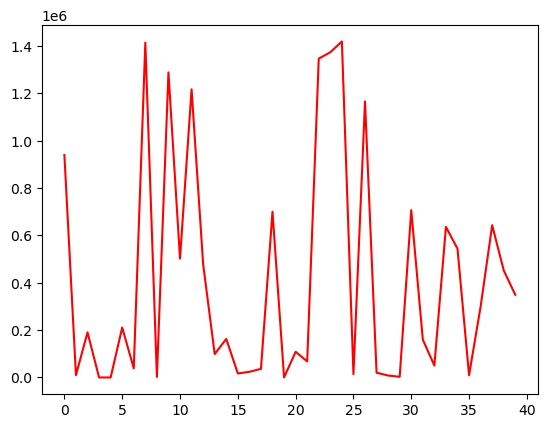

In [44]:
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

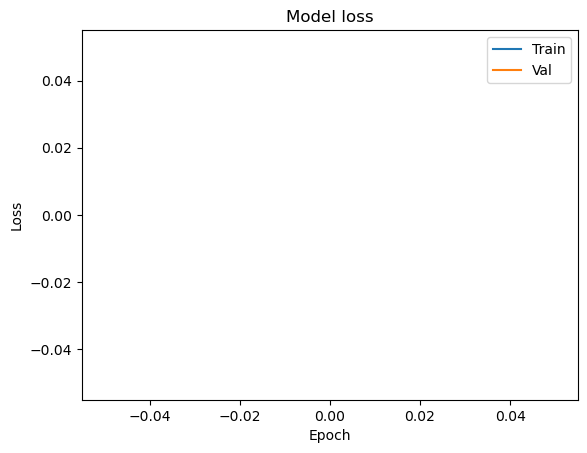

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

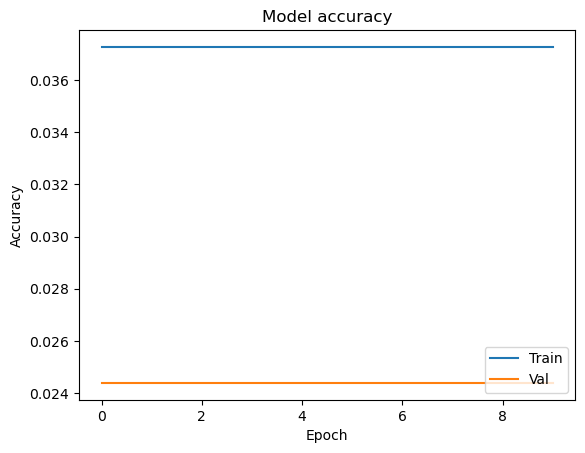

In [46]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [47]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(6,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
11/11 [==============================] - 0s 17ms/step - loss: -7585579.0000 - accuracy: 0.0031 - val_loss: -45004716.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
11/11 [==============================] - 0s 10ms/step - loss: -279510848.0000 - accuracy: 0.0000e+00 - val_loss: -808868800.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
11/11 [==============================] - 0s 8ms/step - loss: -3163826432.0000 - accuracy: 0.0000e+00 - val_loss: -6577227264.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
11/11 [==============================] - 0s 8ms/step - loss: -19018602496.0000 - accuracy: 0.0000e+00 - val_loss: -33830424576.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: -87858790400.0000 - accuracy: 0.0000e+00 - val_loss: -136036622336.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
11/11 [==============================] - 0s 9ms/step - loss: -318232985600.0000 - accuracy: 0.0000e+00 - val_loss: -435131056128.0000 - val_accuracy: 0.0

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [ ]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_kelas_A_laporan_MXX_45444_Antonius Kevin.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#